# Importing necessary libraries

In [39]:
# Import required packages with specific versions
import pandas as pd           # version 1.3.3
import numpy as np            # version 1.21.2
import seaborn as sns         # version 0.11.2
import matplotlib.pyplot as plt # version 3.4.2
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE  # version 0.8.0
import shap                           # version 0.41.0 
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import pickle
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas


# Step 1: Load the Excel DataFrame


In [40]:
# Phase 2: Data Collection and Initial Overview
file_path = 'Dataset.xlsx'
df = pd.read_excel(file_path)

# Display dataset shape and basic info
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset shape: (3576, 69)

First 5 rows of the dataset:


,Folder_name,Feature_name,x1,x2,x3,x4,x5,x6,x7,x8,...,x58,x59,x60,x61,x62,x63,x64,x65,x66,Label
0,Easun Reyrolle Limited,2011,1.36,1.05,0.108311,0.87,0.493521,0.035143,51.61,NaN,...,0.152604,-0.023552,0.528161,0.555320,2.635509,11.989390,5.43,-1.983859,8.497585,Probable Bankrupt
1,Sanofi India Ltd.,2014,1.93,1.20,0.714891,0.00,0.294405,0.026834,88.77,NaN,...,0.038584,0.129462,0.779185,0.983258,2.833987,10.017878,5.44,3.865993,6.386106,Healthy
2,Nestle India Ltd.,2019,1.74,1.16,0.597133,0.03,0.305391,0.038805,172.43,0.691351,...,0.427094,0.236664,1.386083,1.873912,6.785297,3.938826,5.27,5.361666,6.453851,Healthy
3,Bombay Burmah Trading Corporation Ltd.,2020,1.31,1.05,0.070921,0.37,0.278134,0.007278,104.68,0.935546,...,0.078589,0.121094,0.921172,1.056293,11.299706,3.729506,8.00,6.894875,3.871437,Healthy
4,Mandhana Industries Limited(GB Global),2015,1.40,0.70,0.015241,1.37,0.460955,0.060267,93.44,NaN,...,0.203203,0.063738,0.878461,1.311261,4.782413,6.665657,5.44,6.695176,7.410228,Bankrupt


In [41]:
print("Data types of each column:")
df.dtypes

Data types of each column:


Folder_name      object
Feature_name      int64
x1              float64
x2              float64
x3              float64
                 ...   
x63             float64
x64             float64
x65             float64
x66             float64
Label            object
Length: 69, dtype: object

---

### Dataset Description:

The dataset contains financial ratios for companies over a specific period, with a target label indicating their bankruptcy status.

- **Sample size:** 3576 rows
- **Number of features:** 66 financial ratios, 1 target label
- **Labeling method:** 'Healthy', 'Bankrupt', 'Probable Bankrupt', 'Financial Distress'

#### List of Financial Ratios (Fe- X1: Current Assets / Current Liabilities
- X1: Current Assets / Current Liabilities
- X2: (Current Assets - Inventories) / Current Liabilities
- X3: Cash and Cash Equivalents / Current Liabilities
- X4: Total Liabilities / Total Equity
- X5: Current Liabilities / Total Liabilities
- X6: Equity Share Capital / Fixed Assets
- X7: Net Sales / Average Total Assets
- X8: Net Sales / Average Current Assets
- X9: Gross Profit / Net Sales
- X10: Operating Profit / Net Sales
- X11: Net Profit / Net Sales
- X12: Net Profit / Total Assets
- X13: Total Debt / Total Assets
- X14: Working Capital / Total Assets
- X15: Sales / Total Assets
- X16: (Total Assets - Total Assets Previous Year) / Total Assets Previous Year
- X17: Net Profit / Net Sales
- X18: Cash & Short Term Investment / Total Assets
- X19: Cash & Short Term Investment / (Equity Share Capital + Total Liability)
- X20: Cash / Total Assets
- X21: Cash / Current Liabilities
- X22: (Inventory - Inventory Previous Year) / Inventory Previous Year
- X23: Inventory / Sales
- X24: (Current Liabilities - Cash) / Total Asset
- X25: Current Liabilities / Sales
- X26: Total Liabilities / Total Assets
- X27: Total Liabilities / (Equity Share Capital + Total Liabilities)
- X28: Net Income / (Equity Share Capital + Total Liabilities)
- X29: Operating Income / Total Assets
- X30: Operating Income / Sales
- X31: Quick Assets / Current Liabilities
- X32: Dividends / Net Income
- X33: EBIT / Overall Capital Employed
- X34: Net Cash Flow / Revenue
- X35: Cash Flow from Operations / Total Debt
- X36: EBT / Current Liabilities
- X37: EBT / Total Equity
- X38: Equity / Total Liabilities
- X39: (Gross Profit + Depreciation) / Sales
- X40: Quick Assets / Total Assets
- X41: Gross Profit / Total Assets
- X42: Operating Expenses / Total Liabilities
- X43: (Current Assets - Inventory) / Short term Liabilities
- X44: Current Assets / Total Liabilities
- X45: Short term Liabilities / Total Assets
- X46: (Current Assets - Inventory - Short term Liabilities) / (Sales - Gross Profit - Depreciation)
- X47: (Net Profit + Depreciation) / Total Liabilities
- X48: Working Capital / Fixed Assets
- X49: (Total Liabilities - Cash) / Sales
- X50: Long term Liability / Equity Capital
- X51: Current Assets / Total Assets
- X52: Current Liabilities / Assets
- X53: Inventory / Working Capital
- X54: Inventory / Current Liability
- X55: Current Liabilities / Total Liability
- X56: Working Capital / Equity Capital
- X57: Current Liabilities / Equity Share Capital
- X58: Long term Liability / Current Assets
- X59: Total Income / Total Expense
- X60: Total Expense / Assets
- X61: Net Sales / Quick Assets
- X62: Sales / Working Capital
- X63 Inflation Rate
- X64 Unemployment Rate
- X65 Real Interest Rate
- X66 GDP

# Step 2: Exploratory Data Analysis (EDA)


In [42]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Folder_name      0
Feature_name     0
x1               0
x2               0
x3               0
                ..
x63              0
x64             31
x65              0
x66              0
Label            0
Length: 69, dtype: int64


In [43]:
# Statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
df.describe()



Statistical summary of numerical columns:


,Feature_name,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66
count,3576.000000,3576.000000,3576.00000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3164.000000,3576.000000,...,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3545.000000,3576.000000,3576.000000
mean,2018.056488,2.173163,1.75005,0.406081,-0.308809,0.616885,10.227054,66.451899,-3.884544,1.298794,...,0.553991,0.268690,0.029011,0.842102,0.924233,-1.349608,5.592712,6.312542,4.551424,5.795995
std,3.493874,8.950431,8.92544,2.798470,36.080992,2.589314,215.205994,77.746367,890.269207,2.434832,...,13.151791,1.026017,0.309623,0.840378,0.941097,270.439457,1.931399,1.491464,2.638664,4.044748
min,2004.000000,0.000000,0.00000,-0.003281,-1379.150000,0.000000,0.000000,0.000000,-12612.100000,-8.225000,...,-524.124464,0.000000,-1.005653,0.000000,-1.270073,-14315.387880,3.328173,5.270000,-1.983859,-5.831053
25%,2016.000000,0.950000,0.56000,0.038904,0.000000,0.213905,0.019597,1.970000,0.991937,1.047605,...,0.259874,0.042569,-0.018696,0.414783,0.368115,-0.088467,3.938826,5.360000,3.771756,6.386106
50%,2018.000000,1.340000,0.91000,0.110149,0.270000,0.315356,0.049830,54.855000,1.525927,1.095237,...,0.539281,0.126429,0.064899,0.689204,0.704342,2.116034,4.948216,5.440000,5.361666,7.002952
75%,2021.000000,1.960000,1.48000,0.326777,0.960000,0.475971,0.156214,95.285000,2.779374,1.189953,...,1.143910,0.305541,0.146154,1.010915,1.142058,5.691903,6.665657,7.330000,6.695176,7.996254
max,2023.000000,396.250000,396.25000,141.818182,407.970000,67.000000,5529.000000,1233.550000,45036.625000,109.750000,...,170.698990,39.000000,3.097914,16.308035,11.883452,2946.604348,11.989390,10.050000,7.556488,9.050278


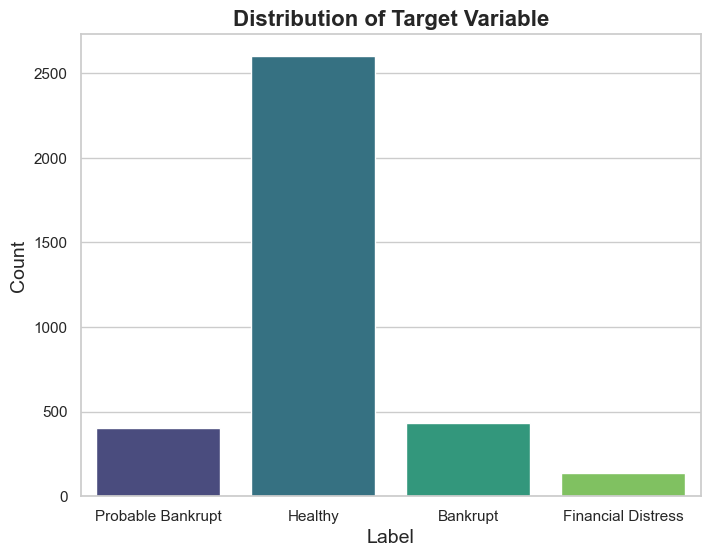

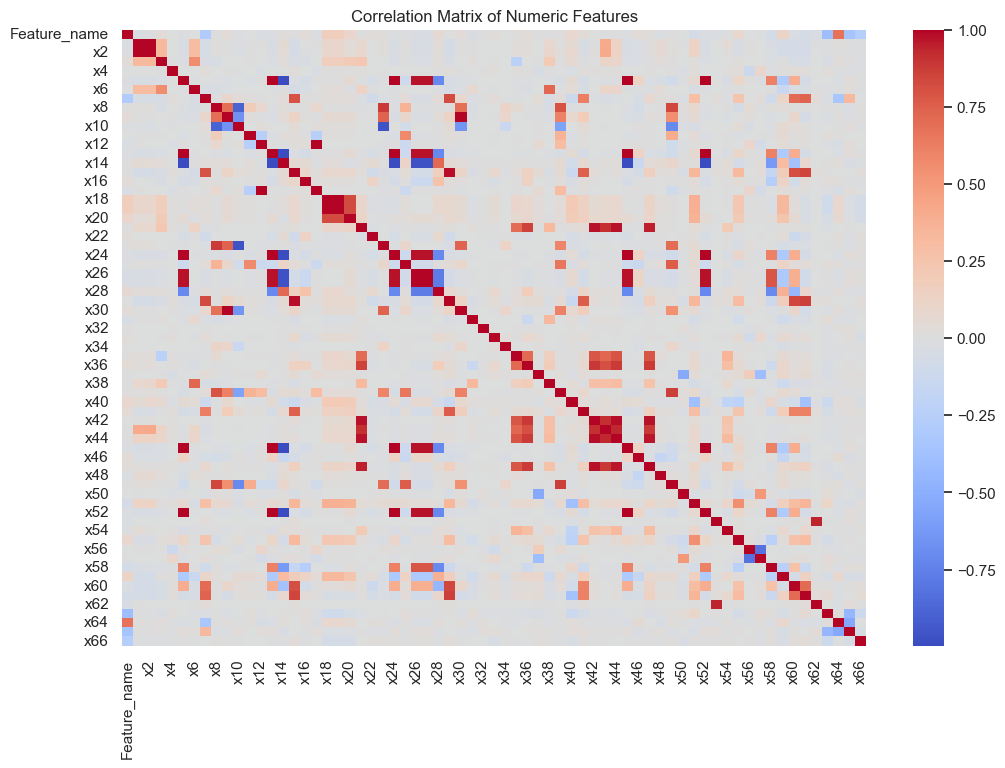

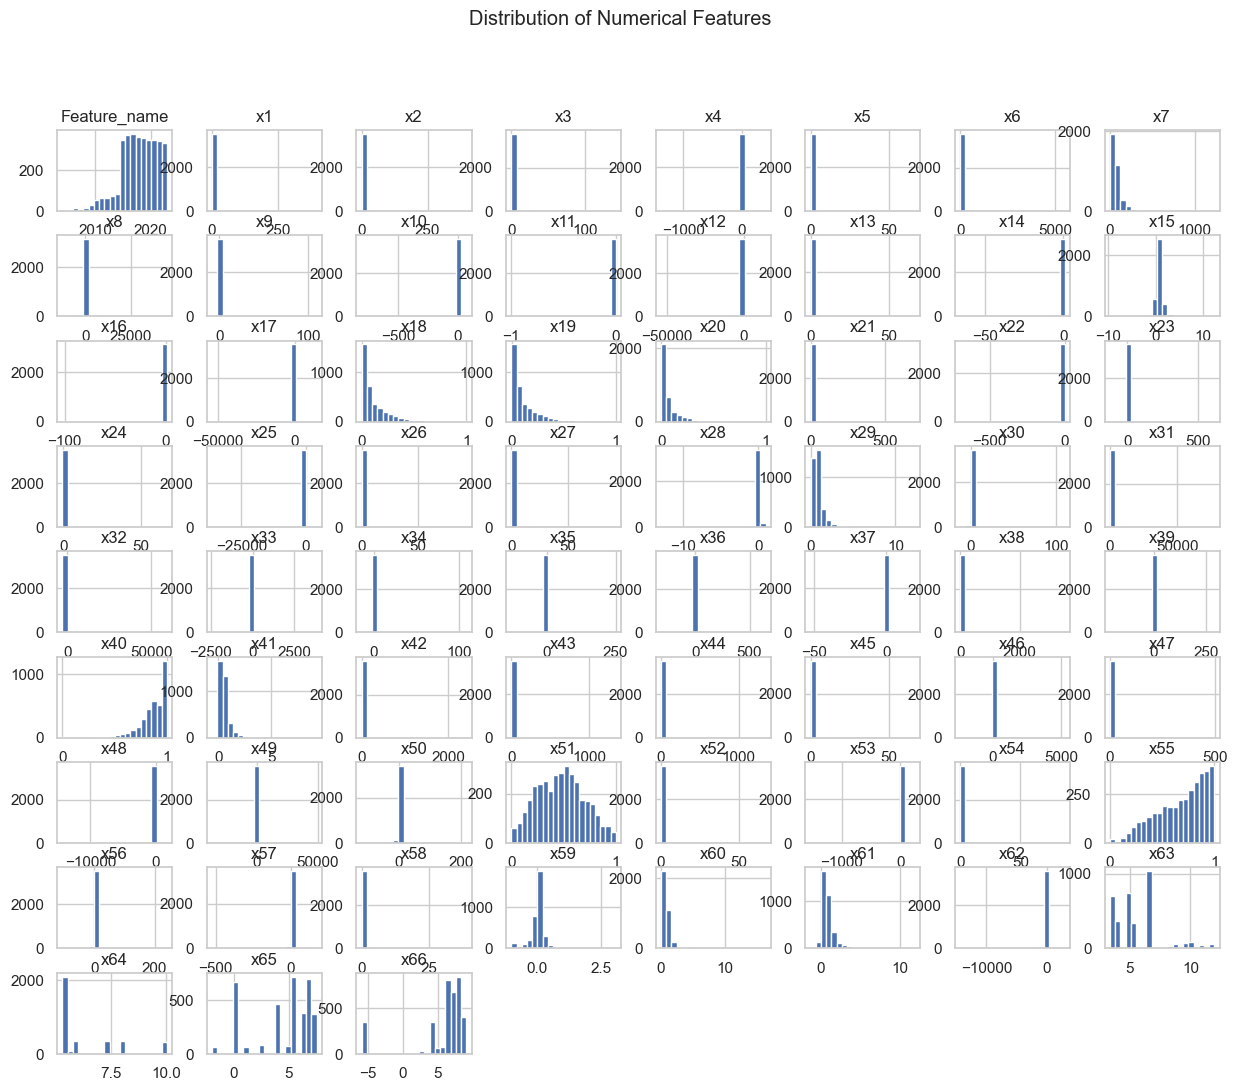

In [44]:
# Set the style and color palette
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Apply a clean style

# Define the color palette with the exact number of unique labels
num_labels = df['Label'].nunique()  # Count unique values in 'Label'
palette = sns.color_palette("viridis", num_labels)  # Adjust palette size

# Plot with adjusted settings
sns.countplot(x='Label', data=df, palette=palette, hue='Label', dodge=False, legend=False)
plt.title("Distribution of Target Variable", fontsize=16, fontweight='bold')
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.show()



# Filter out only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=[np.number])

# Correlation matrix of features (only for numeric columns)
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Visualizing distribution of numerical features using histograms
numeric_columns.hist(bins=20, figsize=(15, 12))
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Step 3: Data Preprocessing


In [49]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Separate numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Handling missing values in numeric columns using mean strategy
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Handling missing values in non-numeric columns using the most frequent value (mode)
imputer_mode = SimpleImputer(strategy='most_frequent')
non_numeric_data_imputed = pd.DataFrame(imputer_mode.fit_transform(df[non_numeric_columns]), columns=non_numeric_columns)

# Combine the imputed numeric and non-numeric data
df_imputed = pd.concat([numeric_data_imputed, non_numeric_data_imputed], axis=1)

# Encode the 'Label' column and print class mappings
if 'Label' in df_imputed.columns:
    label_encoder = LabelEncoder()
    df_imputed['Label'] = label_encoder.fit_transform(df_imputed['Label'])
    
    # Print the label mappings for the "Label" column
    label_mappings = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print("\nLabel mappings for 'Label' column:")
    for label, code in label_mappings.items():
        print(f"  - {label}: {code}")

# Encode other non-numeric columns
for col in non_numeric_columns:
    if col != 'Label' and df_imputed[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df_imputed[col] = label_encoder.fit_transform(df_imputed[col])

# Split features (X) and target (y)
X = df_imputed.drop(['Label', 'Folder_name', 'Feature_name'], axis=1, errors='ignore')
y = df_imputed['Label']
print(f"\nShape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

# Display class distribution before SMOTE
print("\nClass distribution before applying SMOTE:")
class_counts_before = y.value_counts()
for label, count in class_counts_before.items():
    class_name = list(label_mappings.keys())[list(label_mappings.values()).index(label)]
    print(f"  - Class '{class_name}': {count} samples")

# Handling Class Imbalance Using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution after SMOTE
print("\nClass distribution after applying SMOTE:")
class_counts_after = pd.Series(y_resampled).value_counts()
for label, count in class_counts_after.items():
    class_name = list(label_mappings.keys())[list(label_mappings.values()).index(label)]
    print(f"  - Class '{class_name}': {count} samples")




Label mappings for 'Label' column:
  - Bankrupt: 0
  - Financial Distress: 1
  - Healthy: 2
  - Probable Bankrupt: 3

Shape of X (features): (3576, 66)
Shape of y (target): (3576,)

Class distribution before applying SMOTE:
  - Class 'Healthy': 2600 samples
  - Class 'Bankrupt': 434 samples
  - Class 'Probable Bankrupt': 402 samples
  - Class 'Financial Distress': 140 samples

Class distribution after applying SMOTE:
  - Class 'Probable Bankrupt': 2600 samples
  - Class 'Healthy': 2600 samples
  - Class 'Bankrupt': 2600 samples
  - Class 'Financial Distress': 2600 samples


In [48]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
print("\nFeature scaling complete. Displaying sample of scaled features:")

# Display a sample of the scaled features
pd.DataFrame(X_scaled, columns=X.columns).head(5)



Feature scaling complete. Displaying sample of scaled features:


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66
0,-0.091015,-0.084179,-0.064026,0.042601,-0.173679,-0.048530,-0.025136,-0.021508,-0.038646,0.049208,...,0.082501,-0.212116,0.341352,-0.279036,-0.210010,0.012244,2.594352,-0.607757,-2.418120,0.755767
1,-0.031099,-0.068220,0.301731,0.022282,-0.223775,-0.048595,0.437667,-0.021508,-0.034830,0.049760,...,0.008835,-0.292393,0.788900,-0.029134,0.209317,0.013488,1.712626,-0.600497,-0.112816,0.150644
2,-0.051071,-0.072476,0.230725,0.022983,-0.221011,-0.048501,1.479597,-0.018004,-0.051230,0.047387,...,0.062946,-0.018857,1.102453,0.575049,1.082049,0.038260,-1.006130,-0.723914,0.476598,0.170059
3,-0.096270,-0.084179,-0.086571,0.030924,-0.227869,-0.048747,0.635815,-0.017817,-0.069178,0.044789,...,0.008139,-0.264227,0.764425,0.112218,0.280883,0.066562,-1.099746,1.258019,1.080803,-0.570029
4,-0.086810,-0.121419,-0.120145,0.054279,-0.181872,-0.048334,0.495829,-0.021508,-0.070360,0.035810,...,0.080794,-0.176491,0.596663,0.069698,0.530719,0.025704,0.213400,-0.600497,1.002106,0.444144


# Step 4: Model Building

In [28]:
# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)
# Save X_train
np.save('Output/X_train_data.npy', X_train)


In [29]:
# Get the number of classes
n_classes = len(np.unique(y))

# Binarize the labels for ROC curve calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Function to compute ROC curve and ROC area for each class
def compute_multiclass_roc(y_test, y_score, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    return fpr, tpr, roc_auc

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)
fpr_lr, tpr_lr, roc_auc_lr = compute_multiclass_roc(y_test, lr_pred_proba, n_classes)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_pred)}")
print(f"Logistic Regression Micro-averaged ROC AUC: {roc_auc_lr['micro']:.3f}\n")

# XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)
fpr_xgb, tpr_xgb, roc_auc_xgb = compute_multiclass_roc(y_test, xgb_pred_proba, n_classes)
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_pred)}")
print(f"XGBoost Micro-averaged ROC AUC: {roc_auc_xgb['micro']:.3f}\n")

# RandomForest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)
fpr_rf, tpr_rf, roc_auc_rf = compute_multiclass_roc(y_test, rf_pred_proba, n_classes)
print(f"RandomForest Accuracy: {accuracy_score(y_test, rf_pred)}")
print(f"RandomForest Micro-averaged ROC AUC: {roc_auc_rf['micro']:.3f}\n")

# Save Logistic Regression model
with open('Output/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

# Save XGBoost model
with open('Output/xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Save RandomForest model
with open('Output/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

Logistic Regression Accuracy: 0.8072115384615385
Logistic Regression Micro-averaged ROC AUC: 0.953

XGBoost Accuracy: 0.975
XGBoost Micro-averaged ROC AUC: 0.999

RandomForest Accuracy: 0.9649038461538462
RandomForest Micro-averaged ROC AUC: 0.996



In [30]:
# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', lr_model), ('xgb', xgb_model), ('rf', rf_model)],
    voting='soft'
)
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
voting_pred_proba = voting_clf.predict_proba(X_test)
fpr_voting, tpr_voting, roc_auc_voting = compute_multiclass_roc(y_test, voting_pred_proba, n_classes)
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, voting_pred)}")
print(f"Voting Classifier Micro-averaged ROC AUC: {roc_auc_voting['micro']:.3f}\n")

# Save the model
with open('Output/voting_classifier_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)

Voting Classifier Accuracy: 0.9653846153846154
Voting Classifier Micro-averaged ROC AUC: 0.996



# Step 5: Model Evaluation


### Classification Report and Confusion Matrix


Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       529
           1       0.97      1.00      0.98       516
           2       0.98      0.95      0.97       522
           3       0.95      0.97      0.96       513

    accuracy                           0.97      2080
   macro avg       0.97      0.97      0.97      2080
weighted avg       0.97      0.97      0.97      2080



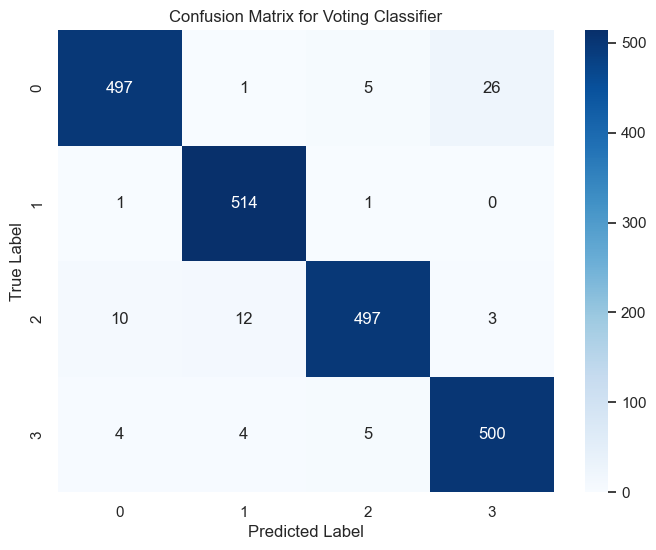

In [31]:
print("\nClassification Report for Voting Classifier:")
print(classification_report(y_test, voting_pred))

# Confusion matrix plot for Voting Classifier
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, voting_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Voting Classifier")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### ROC Curve (One vs Rest)

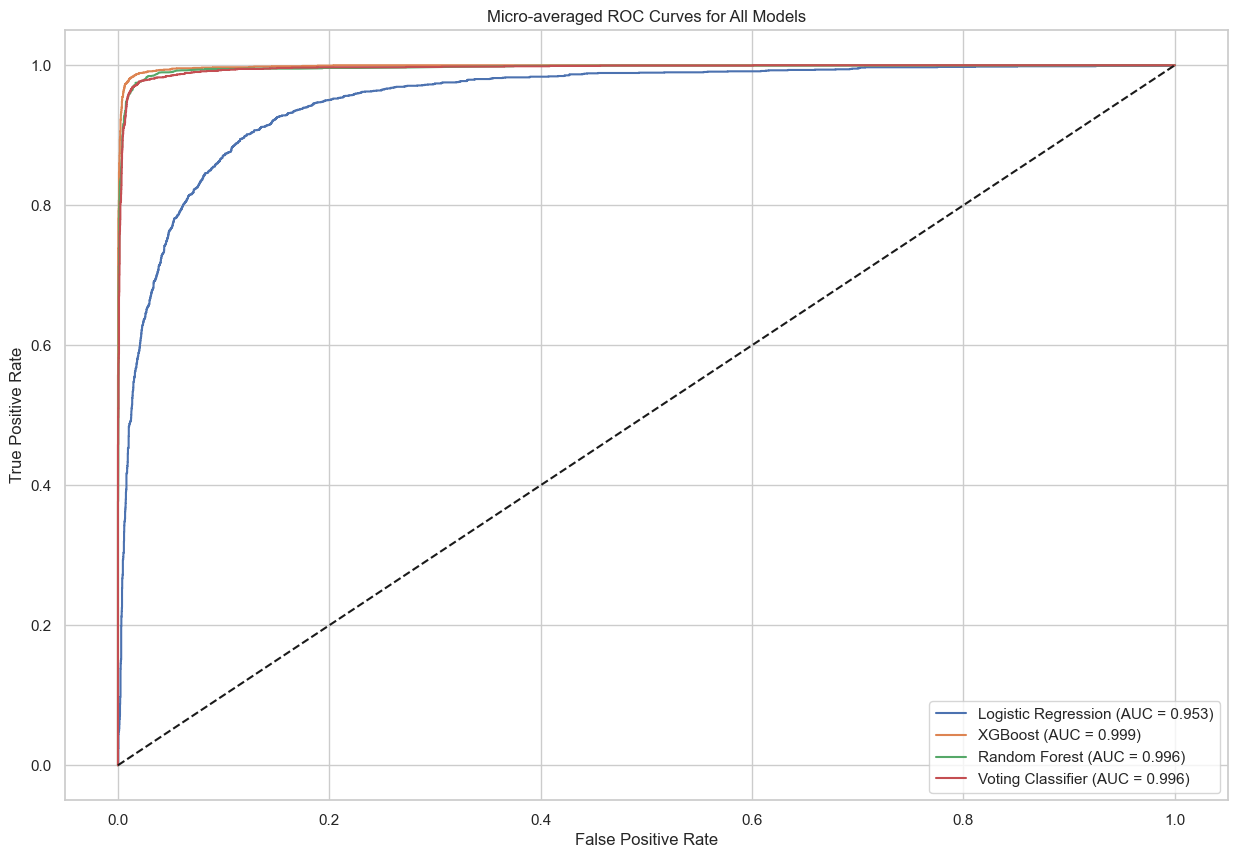

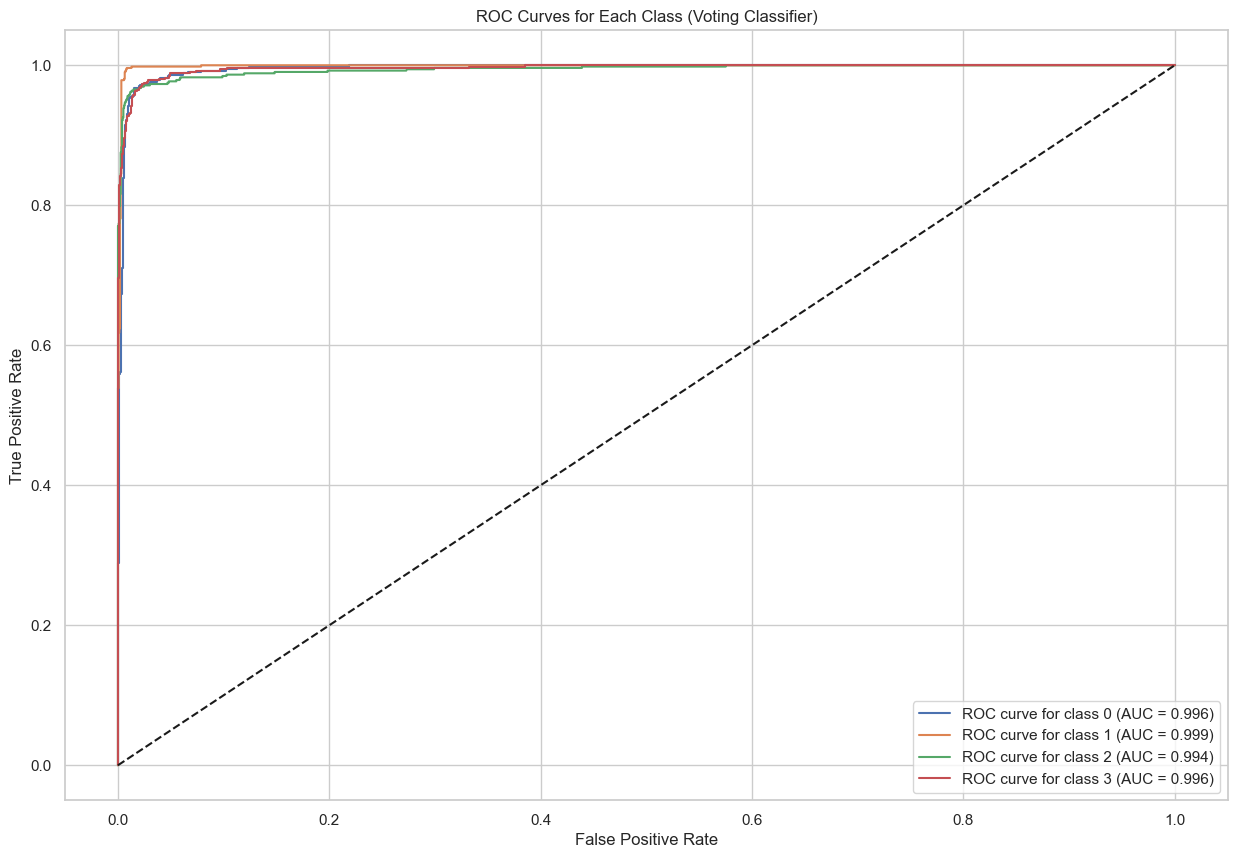

In [32]:
# Plot ROC curves
plt.figure(figsize=(15, 10))

# Plot micro-averaged ROC curves
plt.plot(fpr_lr["micro"], tpr_lr["micro"], 
         label=f'Logistic Regression (AUC = {roc_auc_lr["micro"]:.3f})')
plt.plot(fpr_xgb["micro"], tpr_xgb["micro"],
         label=f'XGBoost (AUC = {roc_auc_xgb["micro"]:.3f})')
plt.plot(fpr_rf["micro"], tpr_rf["micro"],
         label=f'Random Forest (AUC = {roc_auc_rf["micro"]:.3f})')
plt.plot(fpr_voting["micro"], tpr_voting["micro"],
         label=f'Voting Classifier (AUC = {roc_auc_voting["micro"]:.3f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-averaged ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot individual ROC curves for each class (using Voting Classifier as example)
plt.figure(figsize=(15, 10))
for i in range(n_classes):
    plt.plot(fpr_voting[i], tpr_voting[i], 
             label=f'ROC curve for class {i} (AUC = {roc_auc_voting[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class (Voting Classifier)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 6: Final Prediction

In [33]:
def get_user_input():
    # Replace with real input collection or a predefined dictionary for testing
    user_data = {
        'x1': 0.9, 'x2': 0.64, 'x3': 0.07738459, 'x4': 1.6, 'x5': 0.282576959, 'x6': 0.034646665,
        'x7': 61.14, 'x8': 1.846347607, 'x9': 1.194423291, 'x10': 0.546130865, 'x11': -4.44, 'x12': -0.050700018,
        'x13': 0.282576959, 'x14': -0.028334615, 'x15': 0.628274964, 'x16': 0.020878138, 'x17': -0.050700018, 
        'x18': 0.021867102, 'x19': 0.021867102, 'x20': 0.021867102, 'x21': 0.07738459, 'x22': 0.346028998, 
        'x23': 0.135346494, 'x24': 0.260709857, 'x25': 0.527239178, 'x26': 0.678649357, 'x27': 0.678649357, 
        'x28': -0.03464515, 'x29': 0.611431173, 'x30': 1.140823619, 'x31': 3.282150992, 'x32': 0, 'x33': -3.78, 
        'x34': 0.013879353, 'x35': 0.020494078, 'x36': -0.149047275, 'x37': -0.131063456, 'x38': 0.473514989, 
        'x39': 0.811932517, 'x40': 0.927460245, 'x41': 0.388082194, 'x42': 0.255990933, 'x43': 0.643019832, 
        'x44': 0.374629904, 'x45': 0.282576959, 'x46': -1.000778695, 'x47': 0.698302184, 'x48': -0.039356344, 
        'x49': 1.225440806, 'x50': 1.232524058, 'x51': 0.254242343, 'x52': 0.282576959, 'x53': -2.560110803, 
        'x54': 0.256707961, 'x55': 0.416381384, 'x56': -0.088173514, 'x57': 0.879341508, 'x58': 0.396072399, 
        'x59': -0.08432394, 'x60': 0.662920114, 'x61': 0.577874818, 'x62': -18.91523546, 'x63': 8.911793365, 
        'x64': 5.41, 'x65': 1.317979708, 'x66': 5.241315001
    }
    return pd.DataFrame([user_data])

user_input = get_user_input()
# Convert user_input to a NumPy array to remove feature names
user_input_np = user_input.to_numpy()

# Make predictions using the featureless input
prediction = voting_clf.predict(user_input_np)
prediction_proba = voting_clf.predict_proba(user_input_np)

# Map the numerical result to meaningful output
status_map = {0: "Bankrupt", 1: "Financial Distress", 2: "Healthy", 3: "Probable Bankrupt"}
predicted_status = status_map[prediction[0]]
print(f"The predicted status of the company is: {predicted_status}")



The predicted status of the company is: Probable Bankrupt


### Feature Importance

In [34]:
# Define the feature names according to the dataset description
feature_names = [
    "Current Assets / Current Liabilities", 
    "(Current Assets - Inventories) / Current Liabilities", 
    "Cash and Cash Equivalents / Current Liabilities", 
    "Total Liabilities / Total Equity", 
    "Current Liabilities / Total Liabilities", 
    "Equity Share Capital / Fixed Assets", 
    "Net Sales / Average Total Assets", 
    "Net Sales / Average Current Assets", 
    "Gross Profit / Net Sales", 
    "Operating Profit / Net Sales", 
    "Net Profit / Net Sales", 
    "Net Profit / Total Assets", 
    "Total Debt / Total Assets", 
    "Working Capital / Total Assets", 
    "Sales / Total Assets", 
    "(Total Assets - Total Assets Previous Year) / Total AssetsPrevious Year", 
    "Net Profit / Net Sales", 
    "Cash & Short Term Investment / Total Assets", 
    "Cash & Short Term Investment / (Equity Share Capital + Total Liability)", 
    "Cash / Total Assets", 
    "Cash / Current Liabilities", 
    "(Inventory - Inventory Previous Year) / Inventory Previous Year", 
    "Inventory / Sales", 
    "(Current Liabilities - Cash) / Total Asset", 
    "Current Liabilities / Sales", 
    "Total Liabilities / Total Assets", 
    "Total Liabilities / (Equity Share Capital + Total Liabilities)", 
    "Net Income / (Equity Share Capital + Total Liabilities)", 
    "Operating Income / Total Assets", 
    "Operating Income / Sales", 
    "Quick Assets / Current Liabilities", 
    "Dividends / Net Income", 
    "EBIT / Overall Capital Employed", 
    "Net Cash Flow / Revenue", 
    "Cash Flow from Operations / Total Debt", 
    "EBT / Current Liabilities", 
    "EBT / Total Equity", 
    "Equity / Total Liabilities", 
    "(Gross Profit + Depreciation) / Sales", 
    "Quick Assets / Total Assets", 
    "Gross Profit / Total Assets", 
    "Operating Expenses / Total Liabilities", 
    "(Current Assets - Inventory) / Short term Liabilities", 
    "Current Assets / Total Liabilities", 
    "Short term Liabilities / Total Assets", 
    "(Current Assets - Inventory - Short term Liabilities) /(Sales - Gross Profit - Depreciation)", 
    "(Net Profit + Depreciation) / Total Liabilities", 
    "Working Capital / Fixed Assets", 
    "(Total Liabilities - Cash) / Sales", 
    "Long term Liability / Equity Capital", 
    "Current Assets / Total Assets", 
    "Current Liabilities / Assets", 
    "Inventory / Working Capital", 
    "Inventory / Current Liability", 
    "Current Liabilities / Total Liability", 
    "Working Capital / Equity Capital", 
    "Current Liabilities / Equity Share Capital", 
    "Long term Liability / Current Assets", 
    "Total Income / Total Expense", 
    "Total Expense / Assets", 
    "Net Sales / Quick Assets", 
    "Sales / Working Capital", 
    "Inflation Rate", 
    "Unemployment Rate", 
    "Real Interest Rate", 
    "GDP"
]

# Map the numerical result to meaningful output
status_map = {0: "Bankrupt", 1: "Financial Distress", 2: "Healthy", 3: "Probable Bankrupt"}

# Ensure user_input is passed as numpy array, without feature names
user_input_values = user_input.values  # This removes feature names

# Initialize SHAP explainers for each individual model
explainer_lr = shap.Explainer(lr_model, X_train)
explainer_xgb = shap.Explainer(xgb_model, X_train)
explainer_rf = shap.Explainer(rf_model, X_train)

# Get SHAP values for each individual model on the user input (without feature names)
shap_values_lr = explainer_lr(user_input_values).values
shap_values_xgb = explainer_xgb(user_input_values).values
shap_values_rf = explainer_rf(user_input_values).values

# Average the SHAP values from each model
shap_values_ensemble = (shap_values_lr + shap_values_xgb + shap_values_rf) / 3

# Get the predicted class (using the numpy array format for input)
predicted_class = voting_clf.predict(user_input_values)[0]  # This gives the predicted class for the input

# Map the predicted class to its meaningful label
predicted_status = status_map.get(predicted_class, "Unknown")

# Debug: Print predicted status
print(f"Predicted Status: {predicted_status}")

# Select SHAP values for the predicted class
shap_values_for_predicted_class = shap_values_ensemble[0, :, predicted_class]

# Create a DataFrame to display feature importance for the predicted class
shap_summary_df = pd.DataFrame({
    "Feature": feature_names,  # Use the feature names here
    "SHAP Value": shap_values_for_predicted_class
})

# Sort by absolute SHAP values to show most impactful features
shap_summary_df['Absolute SHAP Value'] = shap_summary_df['SHAP Value'].abs()
shap_summary_df = shap_summary_df.sort_values(by='Absolute SHAP Value', ascending=False)

# Display top features contributing to the prediction
print("Top contributing features for the prediction:")
print(shap_summary_df.head(10))


Predicted Status: Probable Bankrupt
Top contributing features for the prediction:
                               Feature  SHAP Value  Absolute SHAP Value
6     Net Sales / Average Total Assets   15.970805            15.970805
62                      Inflation Rate    9.430577             9.430577
63                   Unemployment Rate   -1.743094             1.743094
65                                 GDP    1.305328             1.305328
30  Quick Assets / Current Liabilities    1.163170             1.163170
61             Sales / Working Capital   -1.063712             1.063712
10              Net Profit / Net Sales    1.045379             1.045379
43  Current Assets / Total Liabilities   -0.346233             0.346233
28     Operating Income / Total Assets   -0.321326             0.321326
52         Inventory / Working Capital    0.287277             0.287277


### Report Generation

In [35]:
def generate_pdf_report(predicted_status, shap_summary_df, filename="Output/BankruptcyReport.pdf", top_n=5):
    """
    Generate a PDF report for bankruptcy prediction.
    
    :param predicted_status: The predicted status (e.g., "Bankrupt", "Financial Distress", etc.)
    :param shap_summary_df: DataFrame containing feature importance and SHAP values
    :param filename: Name of the PDF file to save
    :param top_n: Number of top contributing features to include in the report
    """
    c = canvas.Canvas(filename, pagesize=letter)
    width, height = letter

    # Title of the report
    c.setFont("Helvetica-Bold", 16)
    c.drawString(30, height - 40, "Bankruptcy Prediction Report")
    
    # Add the prediction summary
    c.setFont("Helvetica", 12)
    c.drawString(30, height - 60, f"Predicted Status: {predicted_status}")
    
    # Provide a brief explanation based on predicted status
    c.drawString(30, height - 80, f"The company is predicted to be: {predicted_status}.")
    explanation = ""
    
    if predicted_status == "Bankrupt":
        explanation = "The company is predicted to be in bankruptcy, meaning it is highly likely to fail."
    elif predicted_status == "Financial Distress":
        explanation = "The company is in financial distress, indicating it is at risk of failure."
    elif predicted_status == "Healthy":
        explanation = "The company is financially healthy and in a good position."
    elif predicted_status == "Probable Bankrupt":
        explanation = "The company is likely to face bankruptcy but may recover."
    
    c.drawString(30, height - 100, explanation)
    
    # Key financial features contributing to the prediction
    c.drawString(30, height - 120, "Key financial factors contributing to this prediction:")
    
    y_position = height - 140
    for i, row in shap_summary_df.head(top_n).iterrows():
        feature = row['Feature']
        shap_value = row['SHAP Value']
        c.drawString(30, y_position, f"{feature}: SHAP value = {shap_value:.2f}")
        y_position -= 20

    # Recommendations based on the prediction
    c.drawString(30, y_position - 20, "Recommendations:")
    y_position -= 40
    if predicted_status == "Bankrupt":
        c.drawString(30, y_position, "- Immediate restructuring of debt and assets is recommended.")
        c.drawString(30, y_position - 20, "- Explore options for obtaining additional funding.")
    elif predicted_status == "Financial Distress":
        c.drawString(30, y_position, "- Reassess the company’s financial obligations.")
        c.drawString(30, y_position - 20, "- Improve cash flow by focusing on receivables.")
    elif predicted_status == "Healthy":
        c.drawString(30, y_position, "- Maintain strong cash flow and operational efficiencies.")
        c.drawString(30, y_position - 20, "- Continue monitoring financial ratios.")
    elif predicted_status == "Probable Bankrupt":
        c.drawString(30, y_position, "- Initiate measures to improve liquidity.")
        c.drawString(30, y_position - 20, "- Seek advice from financial advisors.")
    
    # Final summary
    c.drawString(30, y_position - 40, "This report provides an analysis of the financial risk and company’s ability to avoid bankruptcy.")
    
    # Save the PDF
    c.save()

# Example of generating the PDF
generate_pdf_report(predicted_status, shap_summary_df)


# Comparison with existing technologies
*1. Altman Z-Score Model (1968)*
 *Overview:*
The Altman Z-Score is one of the earliest and most influential models for predicting bankruptcy, specifically designed for manufacturing companies. It is a linear discriminant model that combines several financial ratios into a single score to assess the financial health of a company.
 *Methodology:*
- *Input Features:* Key financial ratios like working capital to total assets, retained earnings to total assets, and sales to total assets.
- *Calculation:* A weighted sum of these financial ratios is computed to generate the Z-score. 
- *Output:* The Z-score predicts whether a company is at risk of bankruptcy, with lower scores indicating higher risk.
- *Limitations:* The model's reliance on linear relationships and its focus on manufacturing firms limit its applicability to SMEs, which operate in more diverse sectors.
*Relevance to SMEs:*
Although widely used, the Z-Score is often criticized for its lack of adaptability to non-manufacturing firms and its failure to account for non-linear relationships in financial data, which are common in SMEs.


*2. Support Vector Machines (SVM) (Cortes and Vapnik, 1995)*

*Overview:*
Support Vector Machines (SVM) are powerful models for classification tasks, often used in financial prediction tasks, including bankruptcy prediction. SVMs are capable of finding non-linear decision boundaries by transforming input data into a higher-dimensional space.

 *Methodology:*
- *Input Features:* Financial ratios or transformed features (via kernel functions).
- *Model:* 
  - SVM finds the optimal hyperplane that separates 'Bankrupt' and 'Non-Bankrupt' firms with maximum margin.
  - Non-linear SVM uses kernel functions (e.g., polynomial, radial basis function) to map features into a higher-dimensional space.
- *Output:* Binary classification (bankrupt or non-bankrupt) based on the hyperplane.
- *Limitations:* SVMs are computationally expensive for large datasets, and the choice of kernel can significantly affect model performance.

*Relevance to SMEs:*
SVM has been used in bankruptcy prediction for SMEs, especially in cases where the data has complex, non-linear relationships. However, its computational complexity may make it less practical for large datasets.


SVM Accuracy: 0.8572115384615384
SVM Micro-averaged ROC AUC: 0.971

Altman Z-Score Model Accuracy: 0.8072115384615385
Altman Z-Score Micro-averaged ROC AUC: 0.953

Voting Classifier (Altman+SVM) Accuracy: 0.9211538461538461
Voting Classifier (Altman+SVM) Micro-averaged ROC AUC: 0.992



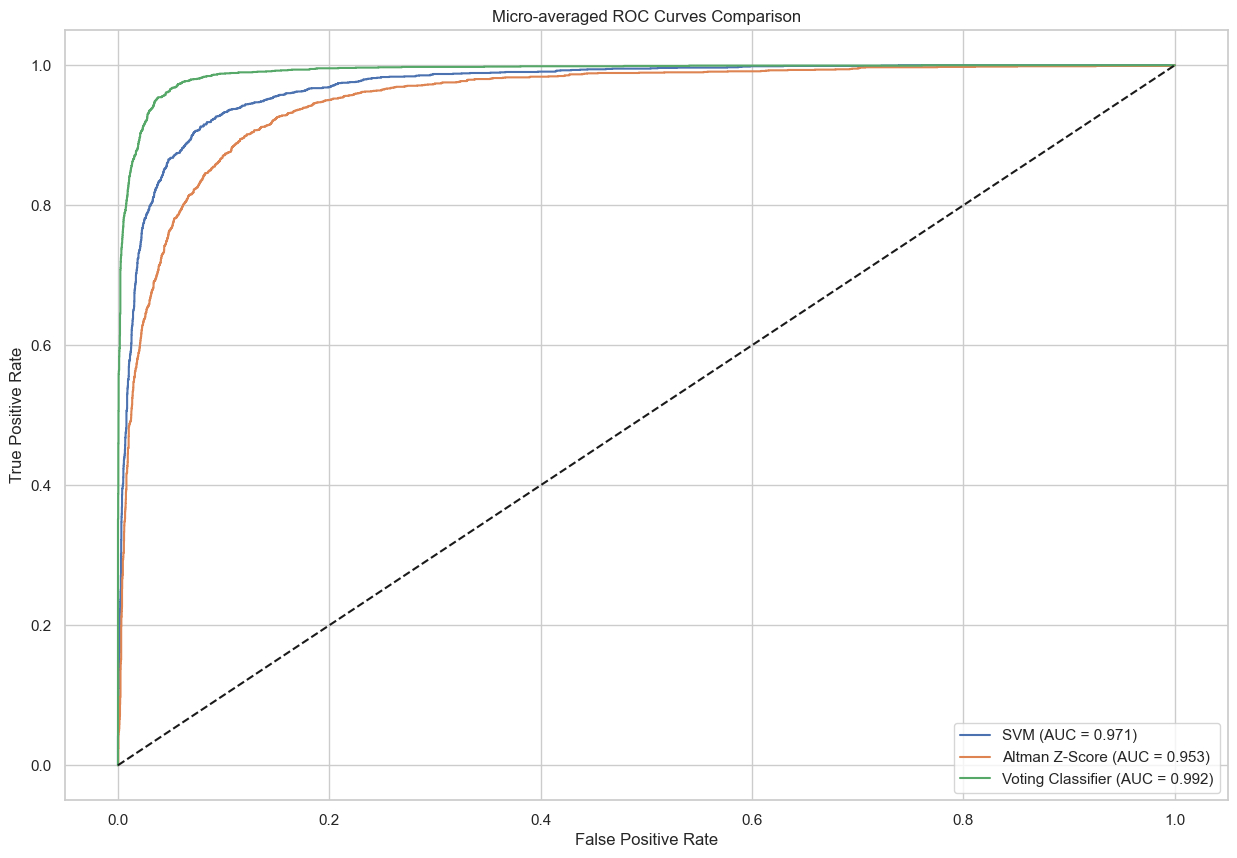

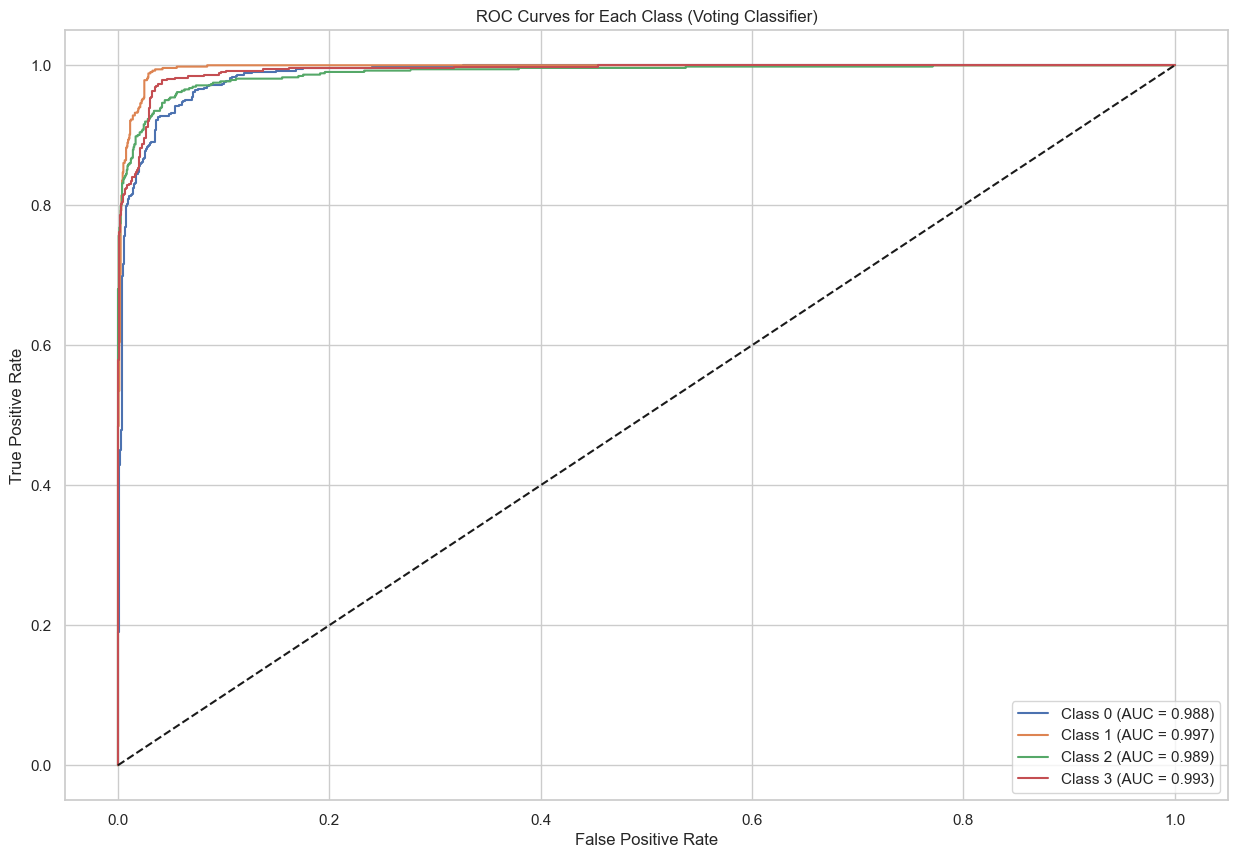

In [36]:
# Get the number of classes
n_classes = len(np.unique(y))

# Binarize the labels for ROC curve calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Function to compute ROC curve and ROC area for each class
def compute_multiclass_roc(y_test, y_score, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    return fpr, tpr, roc_auc

# SVM Model
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42, probability=True))
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_pred_proba = svm_model.predict_proba(X_test)
fpr_svm, tpr_svm, roc_auc_svm = compute_multiclass_roc(y_test, svm_pred_proba, n_classes)
print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred)}")
print(f"SVM Micro-averaged ROC AUC: {roc_auc_svm['micro']:.3f}\n")

# Altman Z-Score Model (using Logistic Regression as placeholder)
altman_model = LogisticRegression(max_iter=1000)
altman_model.fit(X_train, y_train)
altman_pred = altman_model.predict(X_test)
altman_pred_proba = altman_model.predict_proba(X_test)
fpr_altman, tpr_altman, roc_auc_altman = compute_multiclass_roc(y_test, altman_pred_proba, n_classes)
print(f"Altman Z-Score Model Accuracy: {accuracy_score(y_test, altman_pred)}")
print(f"Altman Z-Score Micro-averaged ROC AUC: {roc_auc_altman['micro']:.3f}\n")

# Voting Classifier (Hybrid Model)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('svm', svm_model),
        ('altman', altman_model)
    ],
    voting='soft'
)
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
voting_pred_proba = voting_clf.predict_proba(X_test)
fpr_voting, tpr_voting, roc_auc_voting = compute_multiclass_roc(y_test, voting_pred_proba, n_classes)
print(f"Voting Classifier (Altman+SVM) Accuracy: {accuracy_score(y_test, voting_pred)}")
print(f"Voting Classifier (Altman+SVM) Micro-averaged ROC AUC: {roc_auc_voting['micro']:.3f}\n")

# Plot ROC curves for all models
plt.figure(figsize=(15, 10))

# Plot micro-averaged ROC curves
plt.plot(fpr_svm["micro"], tpr_svm["micro"],
         label=f'SVM (AUC = {roc_auc_svm["micro"]:.3f})')
plt.plot(fpr_altman["micro"], tpr_altman["micro"],
         label=f'Altman Z-Score (AUC = {roc_auc_altman["micro"]:.3f})')
plt.plot(fpr_voting["micro"], tpr_voting["micro"],
         label=f'Voting Classifier (AUC = {roc_auc_voting["micro"]:.3f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-averaged ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot individual ROC curves for each class (using Voting Classifier)
plt.figure(figsize=(15, 10))
for i in range(n_classes):
    plt.plot(fpr_voting[i], tpr_voting[i],
             label=f'Class {i} (AUC = {roc_auc_voting[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class (Voting Classifier)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

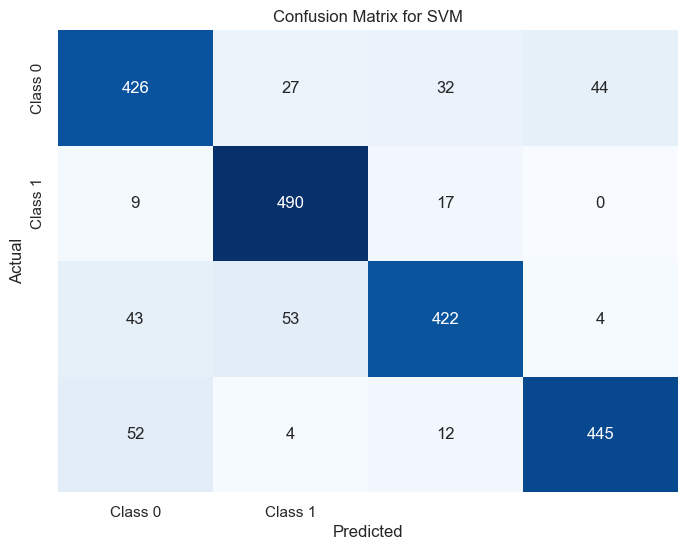

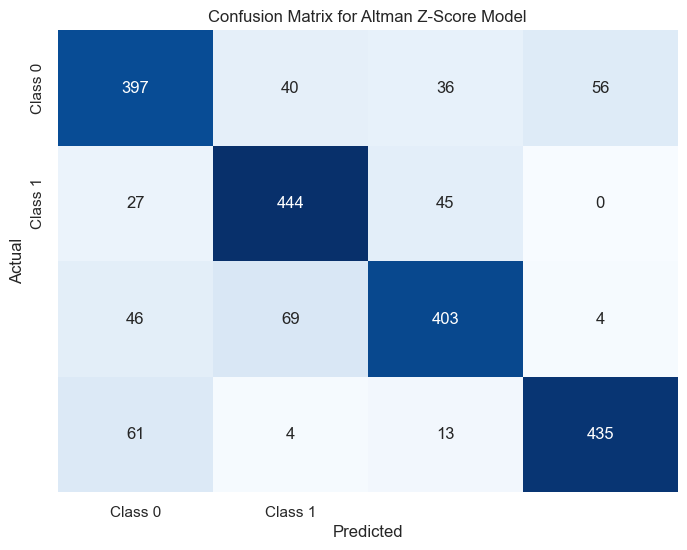

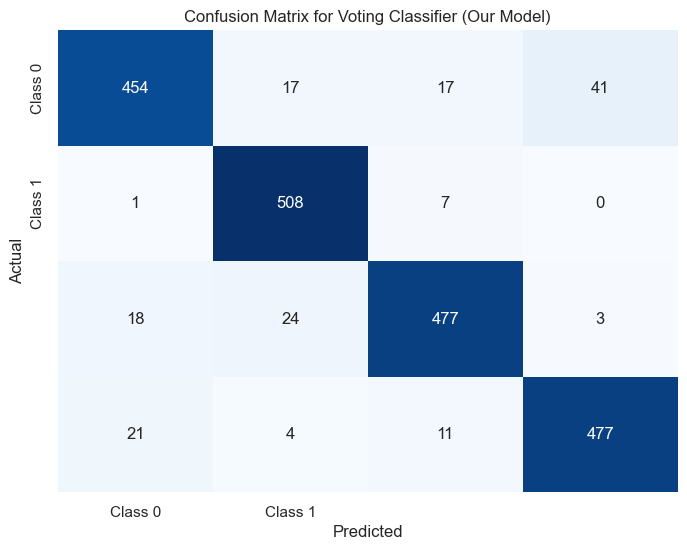

In [37]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix', labels=None):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Generate confusion matrices
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
altman_conf_matrix = confusion_matrix(y_test, altman_pred)
voting_conf_matrix = confusion_matrix(y_test, voting_pred)

# Define labels (optional, depending on your classes)
labels = ['Class 0', 'Class 1']  # Replace with your actual class labels

# Plotting confusion matrices
plot_confusion_matrix(svm_conf_matrix, title='Confusion Matrix for SVM', labels=labels)
plot_confusion_matrix(altman_conf_matrix, title='Confusion Matrix for Altman Z-Score Model', labels=labels)
plot_confusion_matrix(voting_conf_matrix, title='Confusion Matrix for Voting Classifier (Our Model)', labels=labels)


In [38]:
# Classification Reports
print("\nClassification Report for SVM:")
print(classification_report(y_test, svm_pred))

print("\nClassification Report for Altman Z-Score Model:")
print(classification_report(y_test, altman_pred))

print("\nClassification Report for Voting Classfier (Our Model):")
print(classification_report(y_test, voting_pred))


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       529
           1       0.85      0.95      0.90       516
           2       0.87      0.81      0.84       522
           3       0.90      0.87      0.88       513

    accuracy                           0.86      2080
   macro avg       0.86      0.86      0.86      2080
weighted avg       0.86      0.86      0.86      2080


Classification Report for Altman Z-Score Model:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       529
           1       0.80      0.86      0.83       516
           2       0.81      0.77      0.79       522
           3       0.88      0.85      0.86       513

    accuracy                           0.81      2080
   macro avg       0.81      0.81      0.81      2080
weighted avg       0.81      0.81      0.81      2080


Classification Report for Voting Classfier (Our 